<a href="https://colab.research.google.com/github/harikris001/House-Price-Prediction/blob/main/HouseRentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [10]:
from google.colab import files
uploaded = files.upload()

In [26]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [27]:
df = df.drop(columns = ['Posted On','Tenant Preferred'])
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,Contact Owner


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


In [29]:
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [30]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

# PreProcessing

In [31]:
df = df.drop(columns = ['Floor'])
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,Contact Owner


In [32]:
df["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [33]:
df = df.drop(columns=['Area Locality'])

In [34]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,Contact Owner


# Exploratory Analysis

Text(0, 0.5, 'Rent')

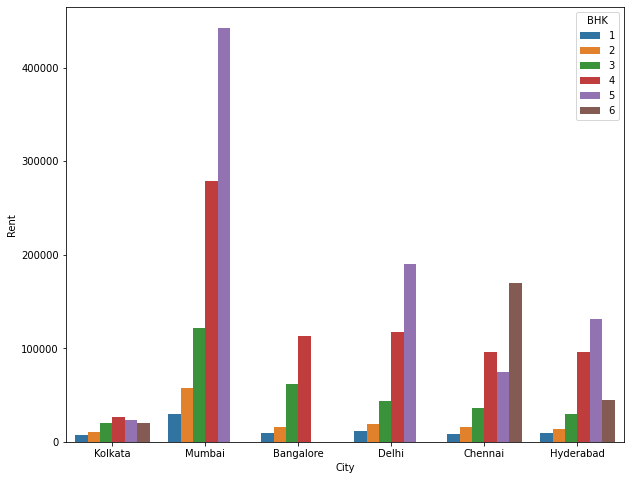

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['City'], y=df['Rent'], hue=df['BHK'],errorbar=None)
plt.xlabel('City')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

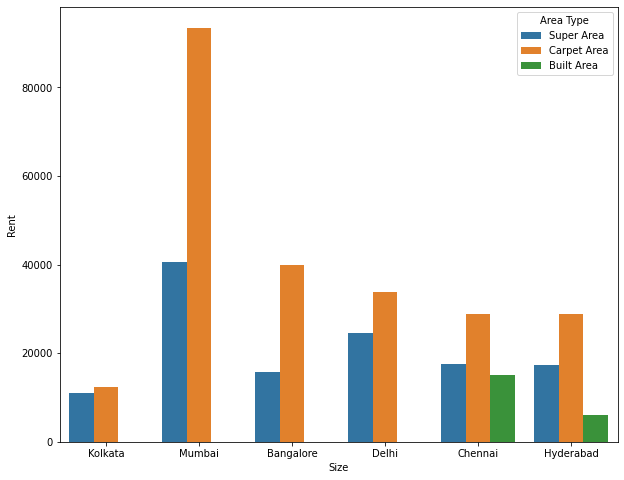

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'],errorbar=None)
plt.xlabel('Size')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

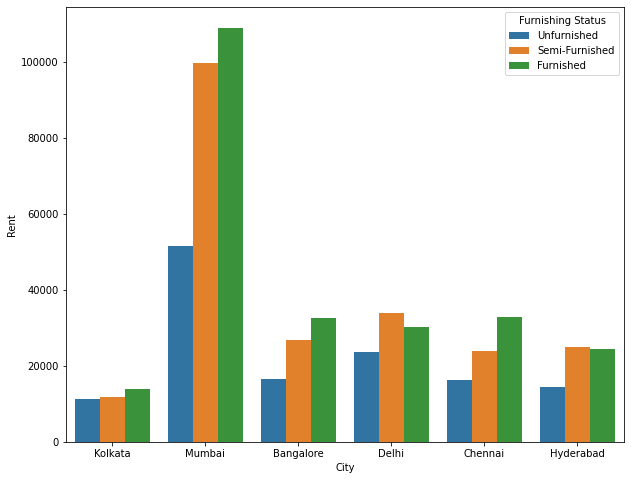

In [49]:
plt.figure(figsize = (10,8))
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Furnishing Status'], errorbar=None)
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

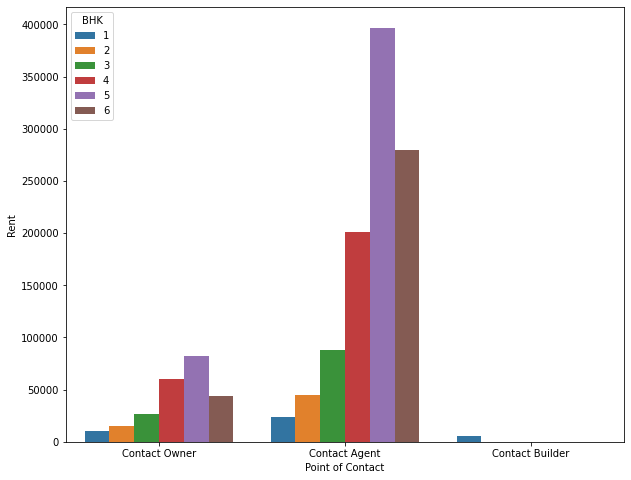

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Point of Contact'], y=df['Rent'], hue=df['BHK'],errorbar=None)
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

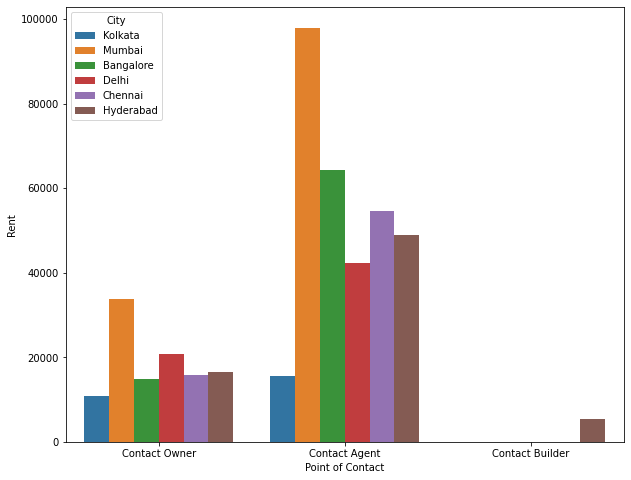

In [51]:
plt.figure(figsize = (10,8))
sns.barplot(x=df['Point of Contact'], y=df['Rent'], hue=df['City'], errorbar=None)
plt.ylabel('Rent')

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Area Type'] = le.fit_transform(df['Area Type'])
df['City'] = le.fit_transform(df['City'])
df['Point of Contact'] = le.fit_transform(df['Point of Contact'])
df['Furnishing Status'] = le.fit_transform(df['Furnishing Status'])
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,2,4,2,2,2
1,2,20000,800,2,4,1,1,2
2,2,17000,1000,2,4,1,1,2
3,2,10000,800,2,4,2,1,2
4,2,7500,850,1,4,2,1,2


# Correlation Matrix with Heatmap

<Axes: >

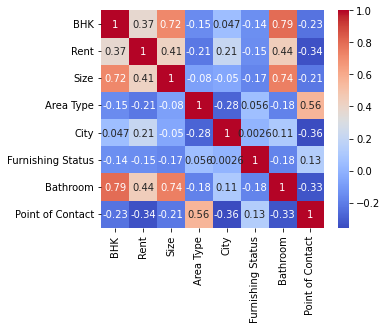

In [59]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Training Model

In [126]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Rent'])
Y = df['Rent']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regression Model
model2=RandomForestRegressor(n_estimators=300, max_depth=60, min_samples_leaf=5, min_samples_split=5, random_state=42)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=300, random_state=42)

# Testing 

In [128]:
from sklearn.metrics import r2_score
y_pred = model2.predict(x_test)
r2_score(y_test, y_pred)*100

72.68858985966953